# analysis

In [17]:
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [18]:
df_proc = pd.read_csv('../data/processed.csv')
df_pred = pd.read_csv('../data/scores_2022_1_9.csv', index_col=0)

df = df_proc.merge(df_pred, on='input_name', how='inner')

df

,input_name,igdb_id,steam_id,personal_rating,feat_rating,feat_popularity,"feat_tags_""game"" 64","feat_tags_""game"" wii",feat_tags_1-up mushroom,feat_tags_12th century,...,feat_emb_text_759,feat_emb_text_760,feat_emb_text_761,feat_emb_text_762,feat_emb_text_763,feat_emb_text_764,feat_emb_text_765,feat_emb_text_766,feat_emb_text_767,predicted_rating
0,Internet Cafe Simulator 2,NaN,1563180.0,NaN,73,0.09,0,0,0,0,...,0.036431,-0.005987,0.010897,-0.003835,-0.007820,-0.006116,-0.001961,0.016175,-0.015337,3.382411
1,You Will (Not) Remain,186483.0,1776160.0,NaN,98,0.09,0,0,0,0,...,-0.046469,-0.012982,-0.005062,-0.032851,-0.042626,0.032410,-0.017440,-0.031375,-0.036576,4.299088
2,VenusBlood HOLLOW International,186513.0,1788780.0,NaN,90,0.05,0,0,0,0,...,0.003919,-0.007668,0.021574,-0.019056,-0.039719,-0.001227,-0.011749,0.002420,-0.026994,4.550889
3,Electrician Simulator - First Shock,186506.0,1781160.0,NaN,88,0.13,0,0,0,0,...,-0.013033,0.057159,-0.011181,0.014731,-0.004543,-0.003837,-0.014539,-0.011641,-0.008448,2.975868
4,Moon Farming - Prologue,NaN,1662060.0,NaN,90,0.09,0,0,0,0,...,0.011619,0.015207,-0.005377,0.026900,-0.026705,-0.010935,-0.000841,0.003758,-0.003834,4.211056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,The Elder Scrolls V: Skyrim Anniversary Upgrade,NaN,1746860.0,NaN,61,0.49,0,0,0,0,...,-0.018970,0.004657,-0.036765,-0.022326,0.017543,-0.009065,-0.001939,-0.050364,-0.019049,3.551030
2489,Mon Bazou,185724.0,1520370.0,NaN,98,0.14,0,0,0,0,...,-0.014672,0.006152,-0.013814,0.008761,-0.005409,-0.051564,-0.016902,-0.002391,0.004967,4.008799
2490,Smart Factory Tycoon: Beginnings,NaN,1810980.0,NaN,80,0.10,0,0,0,0,...,-0.030396,0.031672,0.028646,0.000878,0.043056,0.003354,-0.011176,-0.005572,-0.021934,3.586414
2491,Battlefield™ 2042,125166.0,1517290.0,NaN,33,0.93,0,0,0,0,...,0.030585,-0.043958,0.008780,0.000916,-0.023211,-0.009138,0.014141,0.001273,0.012103,3.839144


In [19]:
df_pred.head(25)

,input_name,predicted_rating
362,Half-Life 2,6.174894
365,Half-Life 2: Episode Two,5.910578
647,STAR WARS™ Empire at War - Gold Pack,5.908163
1956,Paper Mario: The Thousand-Year Door,5.898553
1680,The Legend of Zelda: Ocarina of Time 3D,5.896073
1955,Metroid Prime,5.883335
644,BioShock Infinite,5.858482
1259,ASTRO BOT: Rescue Mission,5.853488
878,Halo: The Master Chief Collection,5.837849
754,Half-Life: Alyx,5.819266


In [20]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

w_p = [(name, weight, pvalue) for (name, weight), (_, pvalue) in zip(results.params.items(), results.pvalues.items())]
w_p_sorted = sorted(w_p, key=lambda x: x[2])

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       predicted_rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     4.728
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           8.45e-13
Time:                        16:01:15   Log-Likelihood:                 4260.3
No. Observations:                2493   AIC:                            -3669.
Df Residuals:                      67   BIC:                         1.045e+04
Df Model:                        2425                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                  0.1479      1.157      0.128      0.899      -2.161       2.457
feat_rating                                                            0.0431      0.012      3.613      0.001       0.019       0.067
feat_popularity                                                        1.0258      1.497      0.685      0.495      -1.962       4.013
feat_tags_"game" 64                                                   -1.4122      1.720     -0.821      0.414      -4.845       2.020
feat_tags_"game" wii                                                  -0.6658      0.758     -0.878      0.383      -2.179       0.847
feat_tags_1-up mushroom                                                0.5157      0.785      0.657      0.513      -1.051       2.082
feat_tags_12th century                                                 0.8963      2.035      0.440      0.661      -3.166       4.959
feat_tags_1500s                                                    -4.678e-13   1.58e-11     -0.030      0.976    -3.2e-11     3.1e-11
feat_tags_16-bit                                                      -0.1088      0.901     -0.121      0.904      -1.907       1.689
feat_tags_16th century                                                 0.5164      1.237      0.418      0.678      -1.952       2.985
feat_tags_18th century                                                -1.8932      3.075     -0.616      0.540      -8.031       4.245
feat_tags_1930s                                                       -0.0705      1.367     -0.052      0.959      -2.799       2.657
feat_tags_1940s                                                       -0.5874      1.308     -0.449      0.655      -3.198       2.023
feat_tags_1960s                                                       -0.3693      1.673     -0.221      0.826      -3.709       2.971
feat_tags_1970s                                                       -0.7797      1.739     -0.448      0.655      -4.250       2.691
feat_tags_1980s                                                        0.2880      0.979      0.294      0.770      -1.666       2.242
feat_tags_1990s                                                       -0.0659      0.489     -0.135      0.893      -1.042       0.911
feat_tags_2.5d                                                        -0.4157      0.255     -1.632      0.107      -0.924       0.093
feat_tags_2010s                                                        0.8504      0.443      1.921      0.059      -0.033       1.734
feat_tags_20th century                                                -0.5385      1.159     -0.465      0.644   

In [21]:
for col, weight, pvalue in w_p_sorted:
    if pvalue <= 0.05:
        print(f'{col}: {weight}, {pvalue}')

feat_rating: 0.043055897040179925, 0.0005801707735861563
feat_tags_political thriller: -3.4153236755466474, 0.004670500922092526
feat_tags_spellbook: -1.7520686419455211, 0.005470585557301433
feat_tags_cooperative: 3.406374982270691, 0.006183948505114104
feat_tags_motion plus support: -1.764350837076389, 0.00723073223451095
feat_tags_motion plus required: -1.764350837076428, 0.007230732234539611
feat_tags_reluctant hero: 0.7981205972924882, 0.00824368761036795
feat_tags_player character: -3.4766153709820546, 0.011420547565623305
feat_tags_prank: 0.6864490339570797, 0.01699066710438626
feat_tags_steal: 0.6864490339570519, 0.016990667104390626
feat_tags_sneaking mission: 0.6864490339570499, 0.016990667104390924
feat_tags_resistance burning skies: 0.8132932445892267, 0.021473395349344487
feat_tags_shooter game: 0.8132932445894139, 0.0214733953493528
feat_tags_resistance burning skies game: 0.8132932445894105, 0.02147339534935342
feat_tags_sengoku period: -1.009609175942567e-14, 0.02777066

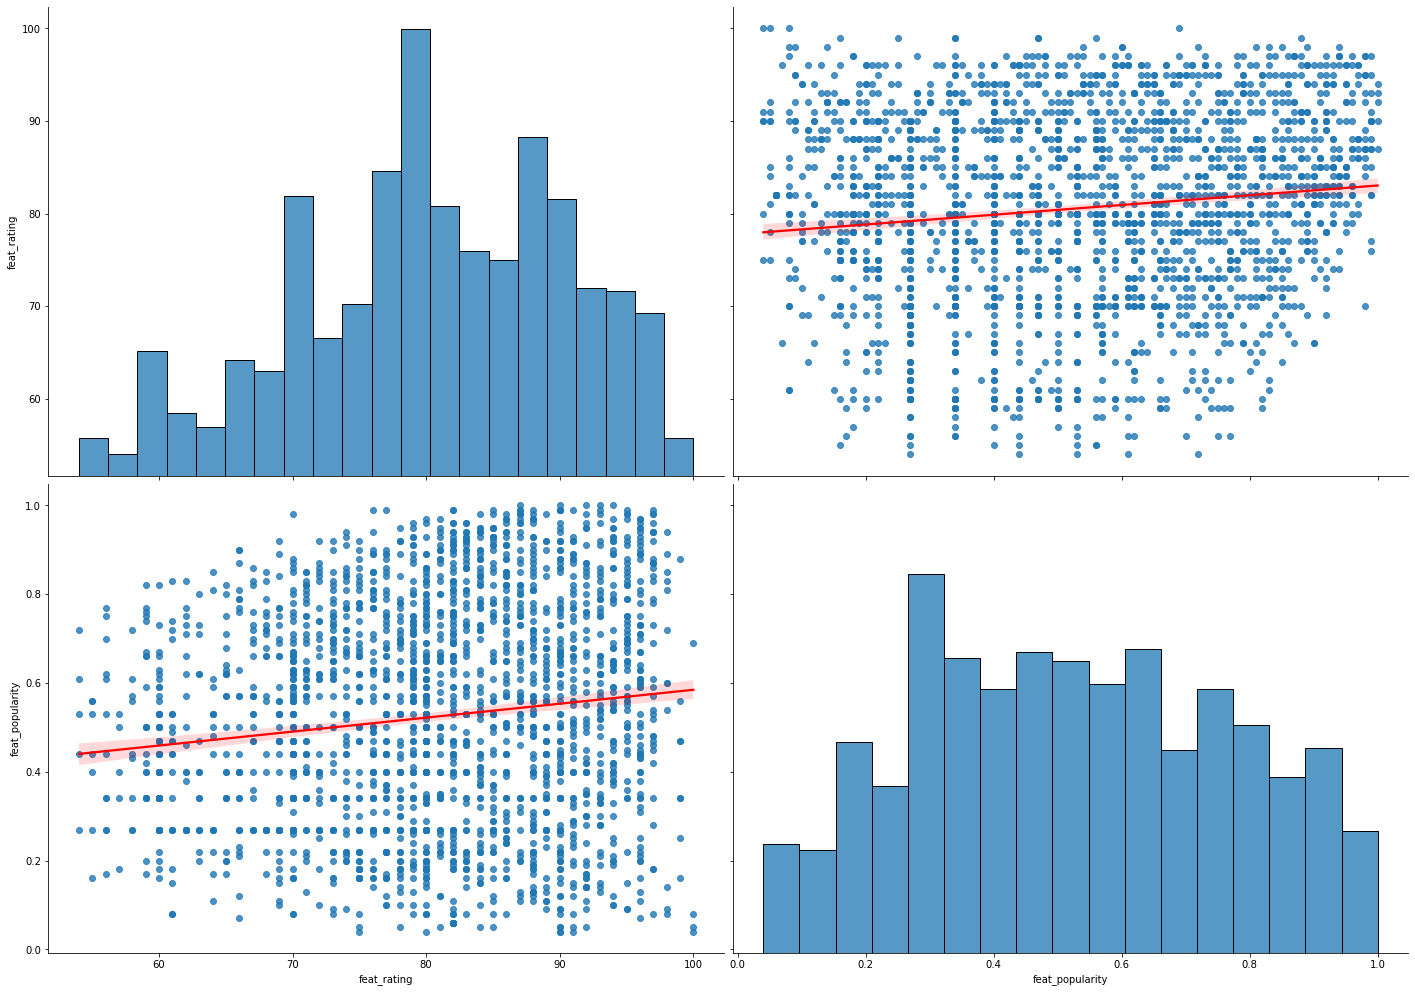

In [22]:
df_chart = df[['feat_rating', 'feat_popularity']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)

In [23]:
### SHAP

import scipy.stats as stats
import shap
from xgboost import XGBRegressor

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

model = XGBRegressor()
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [24]:
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

for col, imp in df_shap.abs().mean().sort_values(ascending=False)[:10].items():
    print(f'{col}: {imp:0.3f}')

feat_rating: 0.286
feat_tags_indie: 0.169
feat_tags_simulator: 0.031
feat_tags_meta_action: 0.027
feat_tags_adventure: 0.020
feat_tags_meta_puzzle: 0.017
feat_popularity: 0.017
feat_tags_horror: 0.014
feat_tags_meta_strategy: 0.014
feat_tags_action: 0.014


In [25]:
corrs = []
for col in X.columns:
    corr, _ = stats.spearmanr(df[col], df_shap[col])
    corr = corr if not np.isnan(corr) else 0
    corrs.append((col, corr))

c_i = [(col, corr, df_shap[col].abs().mean()) for col, corr in corrs]
c_i = sorted(c_i, key=lambda x: x[1]*x[2], reverse=True)

# Top 10
for col, corr, shap_imp in c_i[:100]:
    if 'text' not in col:
        print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')
print()

# Bottom 10
for col, corr, shap_imp in c_i[-100:]:
    if 'text' not in col:
        print(f'{col}: {corr:0.3}//{shap_imp:0.3f}')

An input array is constant; the correlation coefficient is not defined.


feat_rating: 0.967//0.286
feat_tags_meta_action: 0.813//0.027
feat_tags_adventure: 0.859//0.020
feat_tags_action: 0.826//0.014
feat_tags_meta_strategy: 0.744//0.014
feat_tags_meta_puzzle: 0.604//0.017
feat_tags_fantasy: 0.768//0.012
feat_popularity: 0.557//0.017
feat_tags_sword: 0.528//0.013
feat_tags_horror: 0.444//0.014
feat_tags_meta_adventure: 0.754//0.008
feat_tags_meta_scifi: 0.708//0.008
feat_tags_health: 0.521//0.010
feat_tags_platform: 0.531//0.009
feat_tags_strategy: 0.730//0.005
feat_tags_meta_turn_based: 0.495//0.007
feat_tags_science fiction: 0.596//0.005
feat_tags_platformer: 0.419//0.004
feat_tags_sport: 0.414//0.004
feat_tags_meta_sports: 0.424//0.004
feat_tags_shooter: 0.615//0.002
feat_tags_classic: 0.368//0.004
feat_tags_magic: 0.451//0.002
feat_tags_blood: 0.354//0.003
feat_tags_meta_platformer: 0.444//0.002

feat_tags_colony sim: -0.217//0.003
feat_tags_building: -0.328//0.003
feat_tags_third person: -0.442//0.002
feat_tags_simulation: -0.584//0.002
feat_tags_craft

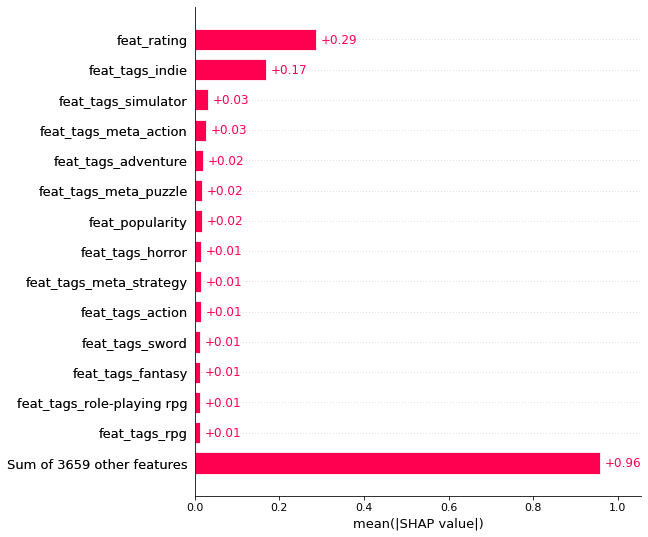

In [26]:
shap.plots.bar(shap_values, max_display=15)

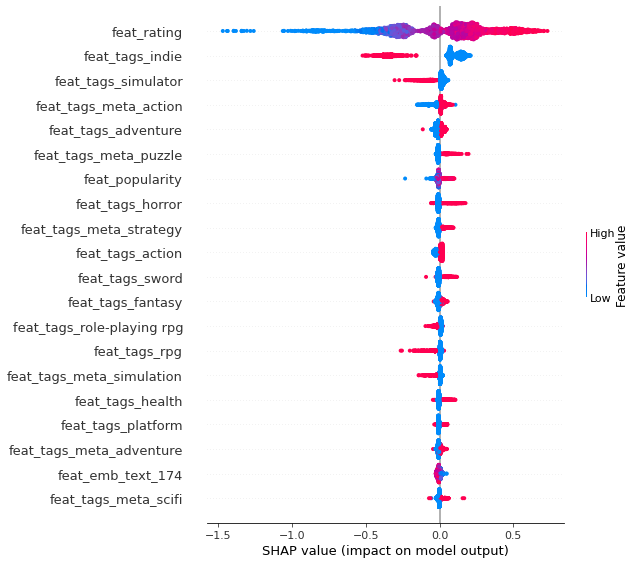

In [27]:
shap.summary_plot(shap_values, X)

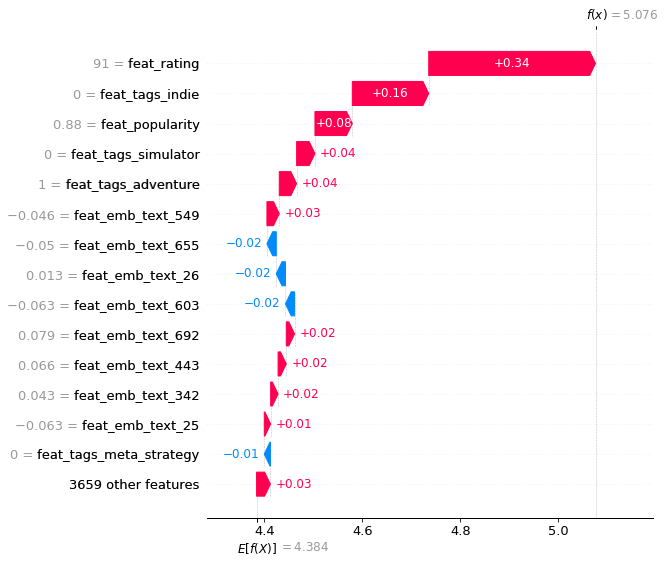

In [28]:
idx = df[df['input_name'] == 'The Legend of Zelda: Majora\'s Mask 3D'].index[0]
shap.plots.waterfall(shap_values[idx], max_display=15)

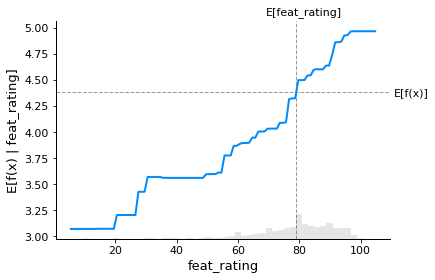

In [29]:
fig,ax = shap.partial_dependence_plot(
    "feat_rating", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
)

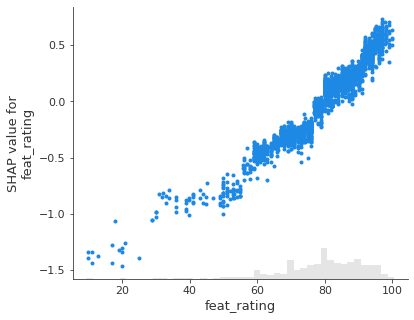

In [30]:
shap.plots.scatter(shap_values[:,"feat_rating"])

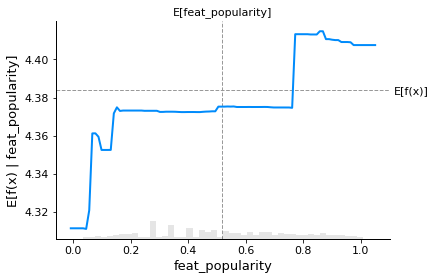

In [31]:
fig,ax = shap.partial_dependence_plot(
    "feat_popularity", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

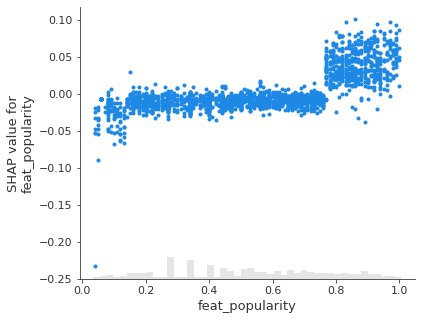

In [32]:
shap.plots.scatter(shap_values[:,"feat_popularity"])

# Insights
- Use stacked shap model. Not perfect but works
- Remove IGDB tags from model. they being fucky. 